# YouTube Channel Performance Analytics

In [5]:
import pandas as pd

# # Load the dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

pd.options.display.float_format = '{:.2f}'.format


print(df.to_string())


      ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  Year Day of Week  Revenue per 1000 Views (USD)  Monetized Playbacks (Estimate)  Playback-Based CPM (USD)  CPM (USD)  Ad Impressions  Estimated AdSense Revenue (USD)  DoubleClick Revenue (USD)  YouTube Ads Revenue (USD)  Watch Page Ads Revenue (USD)  YouTube Premium (USD)  Transaction Revenue (USD)  Transactions  Revenue from Transactions (USD)  Reactions  Chat Messages Count  Reminders Set  Stream Hours  Remix Views  Remix Count  Subscribers from Posts  New Comments  Shares  Like Rate (%)  Dislikes    Likes  Unsubscribes  New Subscribers  Returned Items (USD)  Unconfirmed Commissions (USD)  Approved Commissions (USD)  Orders  Total Sales Volume (USD)  End Screen Click-Through Rate (%)  End Screen Impressions  End Screen Clicks  Teaser Click-Through Rate (%)  Teaser Impressions  Teaser Clicks  Card Click-Through Rate (%)  Card Impressions  Card Clicks  Views per Playlist Start  Playlist Views  Playlist Watch 

In [289]:
print(df.isna().sum())
print("\nDuplicates: ", df.duplicated().sum(), "\n")
print(df.isnull().sum())
df.info


ID                                    0
Video Duration                        0
Video Publish Time                    0
Days Since Publish                    0
Day                                   0
Month                                 0
Year                                  0
Day of Week                           0
Revenue per 1000 Views (USD)          0
Monetized Playbacks (Estimate)        0
Playback-Based CPM (USD)              0
CPM (USD)                             0
Ad Impressions                        0
Estimated AdSense Revenue (USD)       0
DoubleClick Revenue (USD)             0
YouTube Ads Revenue (USD)             0
Watch Page Ads Revenue (USD)          0
YouTube Premium (USD)                 0
Transaction Revenue (USD)             0
Transactions                          0
Revenue from Transactions (USD)       0
Reactions                             0
Chat Messages Count                   0
Reminders Set                         0
Stream Hours                          0


<bound method DataFrame.info of       ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0      0          201.00  2016-06-02 00:00:00                   0    2      6   
1      1          391.00  2016-06-10 00:00:00                   8   10      6   
2      2          133.00  2016-06-14 00:00:00                   4   14      6   
3      3           14.00  2016-06-29 00:00:00                  15   29      6   
4      4           45.00  2016-07-01 00:00:00                   2    1      7   
5      5          496.00  2016-07-08 00:00:00                   7    8      7   
6      6            9.00  2016-08-05 00:00:00                  28    5      8   
7      7           34.00  2016-08-08 00:00:00                   3    8      8   
8      8           11.00  2016-08-11 00:00:00                   3   11      8   
9      9           14.00  2016-08-12 00:00:00                   1   12      8   
10    10           29.00  2016-08-17 00:00:00                   5   17      8

In [290]:
print(df.describe(include='all'))

           ID  Video Duration   Video Publish Time  Days Since Publish    Day  \
count  364.00          364.00                  364              364.00 364.00   
unique    NaN             NaN                  357                 NaN    NaN   
top       NaN             NaN  2017-03-24 00:00:00                 NaN    NaN   
freq      NaN             NaN                    2                 NaN    NaN   
mean   181.50          664.24                  NaN                8.41  15.81   
std    105.22          330.65                  NaN               15.37   8.92   
min      0.00            9.00                  NaN                0.00   1.00   
25%     90.75          496.00                  NaN                3.00   8.00   
50%    181.50          613.00                  NaN                5.00  16.00   
75%    272.25          786.50                  NaN                9.00  23.00   
max    363.00         2311.00                  NaN              260.00  31.00   

        Month    Year Day o

In [291]:
# Adjust the display settings to show all columns
pd.set_option('display.max_columns', None)

# Print data types of all columns
print(df.dtypes)


ID                                      int64
Video Duration                        float64
Video Publish Time                     object
Days Since Publish                      int64
Day                                     int64
Month                                   int64
Year                                    int64
Day of Week                            object
Revenue per 1000 Views (USD)          float64
Monetized Playbacks (Estimate)        float64
Playback-Based CPM (USD)              float64
CPM (USD)                             float64
Ad Impressions                        float64
Estimated AdSense Revenue (USD)       float64
DoubleClick Revenue (USD)             float64
YouTube Ads Revenue (USD)             float64
Watch Page Ads Revenue (USD)          float64
YouTube Premium (USD)                 float64
Transaction Revenue (USD)             float64
Transactions                          float64
Revenue from Transactions (USD)       float64
Reactions                         

In [292]:
print(df.columns.tolist())


['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)', 'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube\xa0Premium (USD)', 'Transaction Revenue (USD)', 'Transactions', 'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count', 'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count', 'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers', 'Returned Items (USD)', 'Unconfirmed Commissions (USD)', 'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)', 'End Screen Click-Through Rate (%)', 'End Screen Impressions', 'End Screen Clicks', 'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks', 'Card Click-Through Rate (%)'

# Bar Chart: Total revenue per year

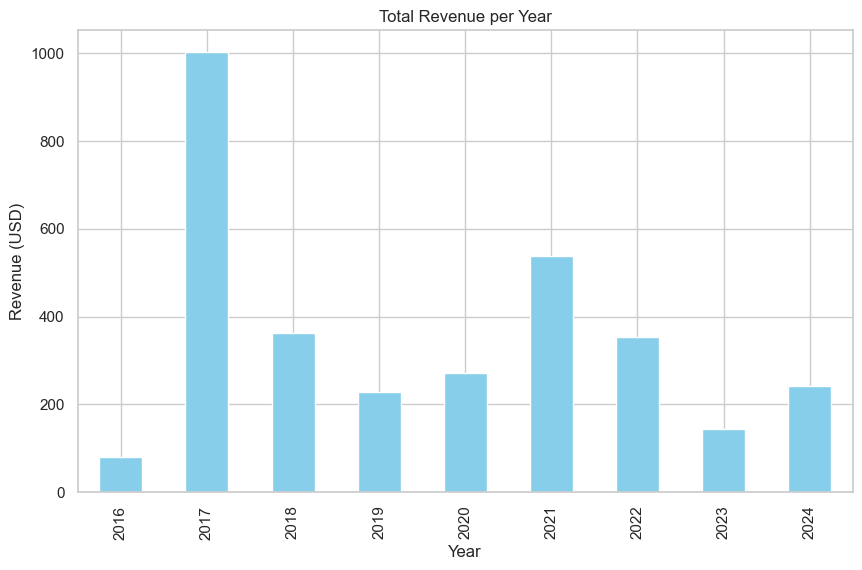

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sum revenue
revenue_per_year = df.groupby('Year')['Estimated Revenue (USD)'].sum()

# Plot
revenue_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Revenue per Year')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year')
plt.show()


# Scatter Plot: Subscribers vs Estimated Revenue (USD)

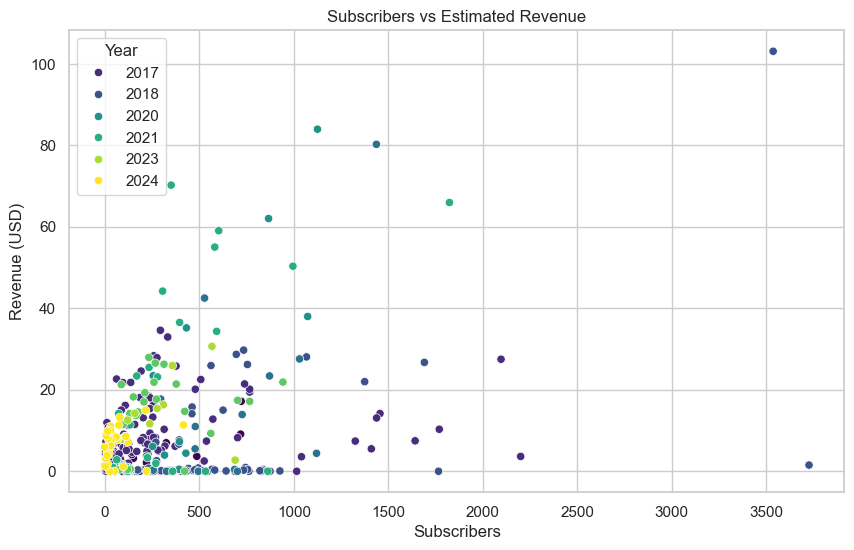

In [294]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Subscribers', y='Estimated Revenue (USD)', hue='Year', palette='viridis')
plt.title('Subscribers vs Estimated Revenue')
plt.xlabel('Subscribers')
plt.ylabel('Revenue (USD)')
plt.show()


# Line Plot: Views Over Time

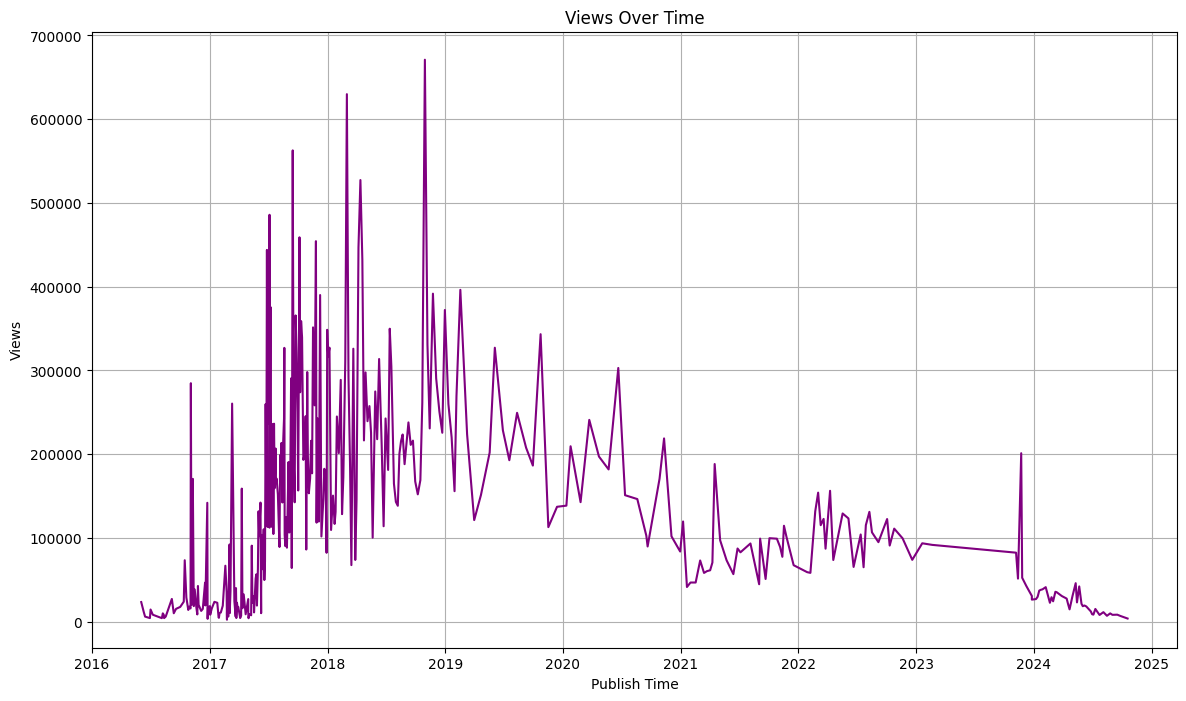

In [6]:
# Ensure Video Publish Time is datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Sort by publish time
df = df.sort_values('Video Publish Time')

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['Video Publish Time'], df['Views'], label='Views', color='purple')
plt.title('Views Over Time')
plt.xlabel('Publish Time')
plt.ylabel('Views')
plt.grid()
plt.show()


#  Histogram: Distribution of Video Thumbnail CTR (%)

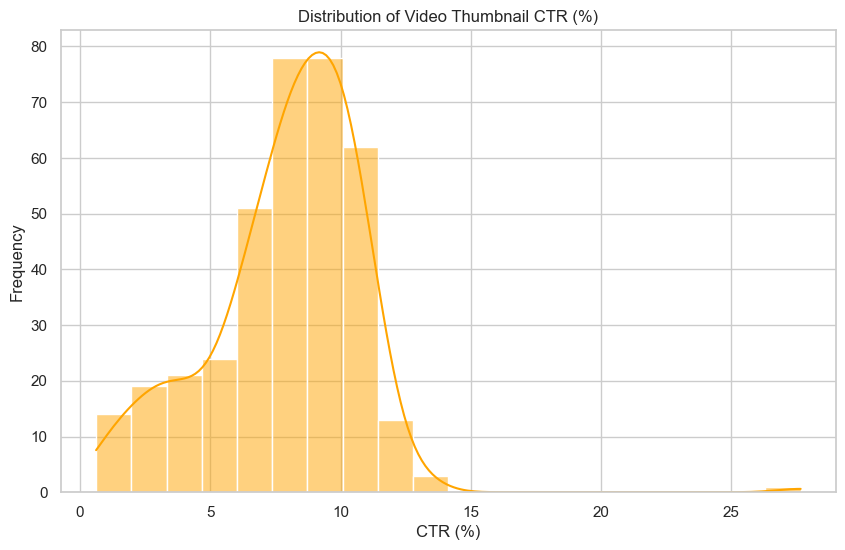

In [296]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Thumbnail CTR (%)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Video Thumbnail CTR (%)')
plt.xlabel('CTR (%)')
plt.ylabel('Frequency')
plt.show()


# Heatmap: Correlation Between 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Views', 'Impressions'

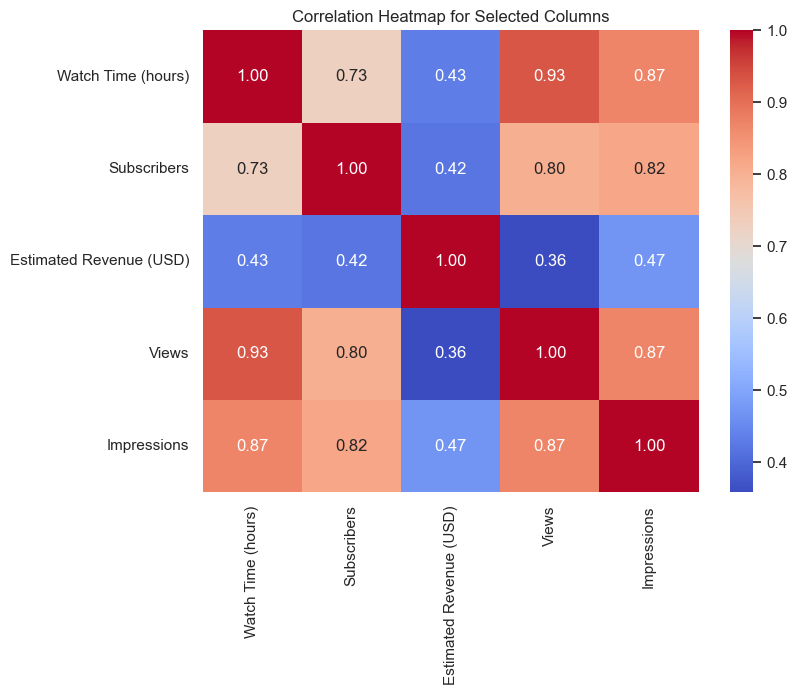

In [297]:
# Select the important columns
important_columns = df[['Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Views', 'Impressions']]

# Calculate and plot correlation heatmap for the selected columns
plt.figure(figsize=(8, 6))
sns.heatmap(important_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Columns')
plt.show()


# REGRESSION

In [12]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Remove outliers using the Interquartile Range (IQR)
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Select features and target
features = ['Watch Time (hours)', 'Views', 'Impressions']
target = 'New Subscribers'

# Remove outliers
df_cleaned = remove_outliers(df, features + [target])

# Prepare data
X = df_cleaned[features]
y = df_cleaned[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Gradient Boosting Regressor to prevent negative predictions
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Step 3: Clip predictions to prevent negatives
y_pred = np.clip(y_pred, 0, None)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 20368.251295501555
Mean Absolute Error: 97.26047813209468
R-squared: 0.6545807657661764


# Scatter Plot (Actual vs Predicted)  
This plot will show the actual values vs. the predicted values of new subscribers, helping us assess how closely the model's predictions match the real data.

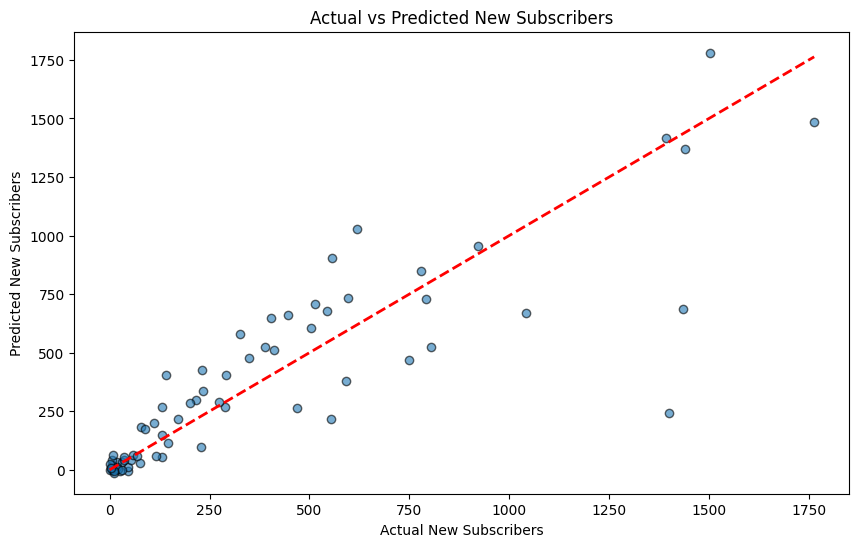

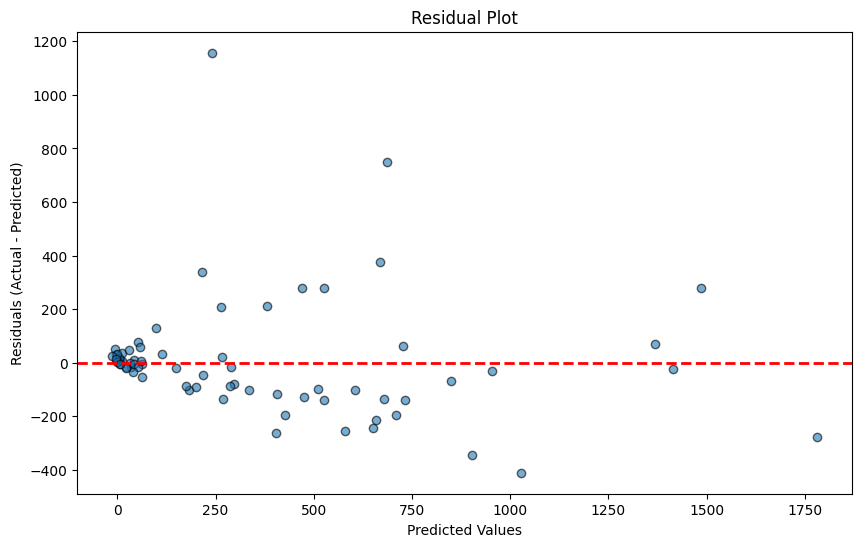

In [11]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted New Subscribers")
plt.xlabel("Actual New Subscribers")
plt.ylabel("Predicted New Subscribers")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


# Feature Importance (Coefficient Plot)  
This plot will show how important each feature is in predicting the target variable by looking at the regression model's coefficients.

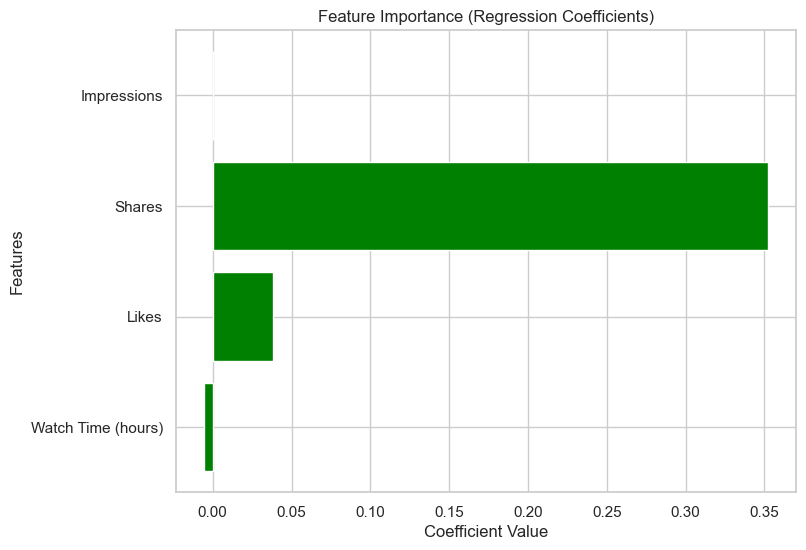

In [300]:
import numpy as np

# Get the coefficients for each feature
coefficients = model.coef_

# Create a bar plot to visualize the importance of each feature
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='green')
plt.title('Feature Importance (Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()


# Residual Plot  
The residual plot will help you analyze if the model's residuals (errors) are randomly distributed, which is important for validating a regression model.

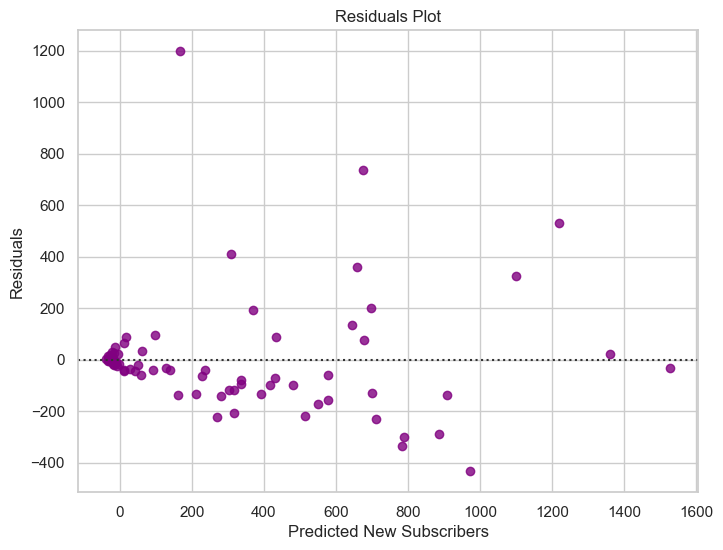

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals using seaborn's residplot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='purple', line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot')
plt.xlabel('Predicted New Subscribers')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



Predicted values for test data: [302.33653418 -20.14600886 -17.150416    97.77362837 166.61792575]


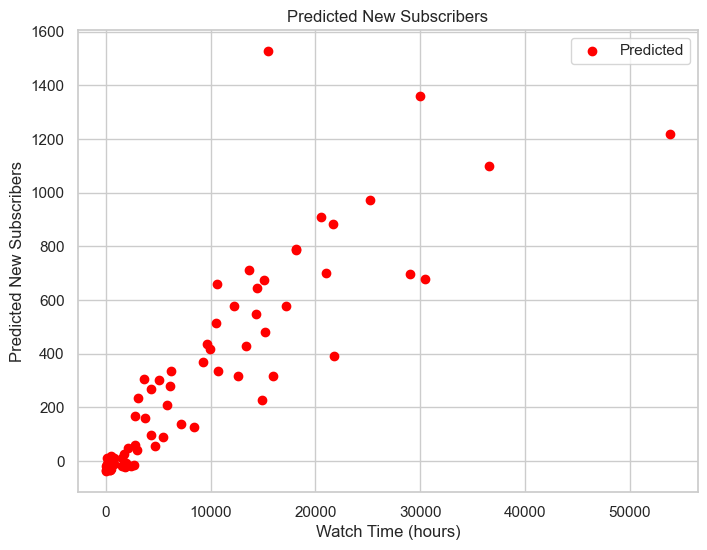

Mean Squared Error: 52011.23616192415
R-squared: 0.7172289848542659


In [302]:
# Predicting values for test data
y_pred_test = model.predict(X_test)

# Print some predicted values to inspect
print("Predicted values for test data:", y_pred_test[:5])

# Plot the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Watch Time (hours)'], y_pred_test, color='red', label='Predicted')
plt.title('Predicted New Subscribers')
plt.xlabel('Watch Time (hours)')
plt.ylabel('Predicted New Subscribers')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Actual vs Predicted Values


In [303]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual New Subscribers': y_test,
    'Predicted New Subscribers': y_pred_test
})

# Print the comparison DataFrame
print(comparison_df)



     Actual New Subscribers  Predicted New Subscribers
193                  216.00                     302.34
33                    47.00                     -20.15
15                    47.00                     -17.15
347                  228.00                      97.77
57                  1399.00                     166.62
183                  447.00                     577.88
76                     3.00                     -28.89
119                  233.00                     317.19
152                  557.00                     971.77
126                  200.00                     228.45
227                  792.00                     909.34
39                    19.00                     -10.85
303                  171.00                     280.58
55                    75.00                     -13.66
137                  142.00                     317.77
298                  411.00                     481.61
0                     54.00                      -4.99
225       